AIRBNB 

Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)

Loading the dataset

In [2]:
train_users_data=pd.read_csv("C://Users/ksnss/Downloads/train_users_2.csv.zip")
test_users_data=pd.read_csv("C://Users/ksnss/Downloads/test_users.csv.zip")
sessions_data=pd.read_csv("C://Users/ksnss/Downloads/sessions.csv.zip")
countries_data=pd.read_csv("C://Users/ksnss/Downloads/countries.csv.zip")
age_gender_bkts_data=pd.read_csv("C://Users/ksnss/Downloads/age_gender_bkts.csv.zip")

In [3]:
train_users_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
train_users_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [4]:
test_users_data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [5]:
sessions_data

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [6]:
countries_data

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [7]:
age_gender_bkts_data

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


Visualizing Data

<AxesSubplot:xlabel='gender', ylabel='count'>

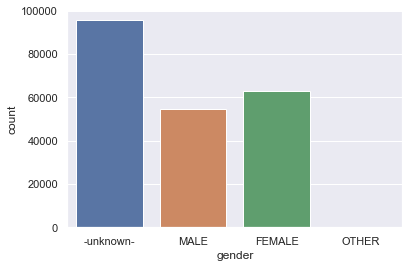

In [8]:
#Visualizing the count of different genders in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", data=train_users_data)

<AxesSubplot:xlabel='gender', ylabel='count'>

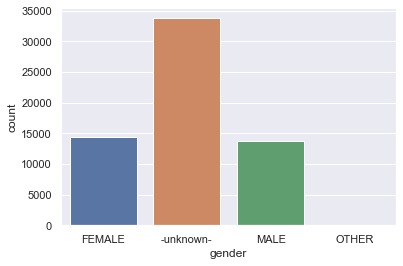

In [9]:
#Visualizing the count of different genders in test users
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", data=test_users_data)

<AxesSubplot:xlabel='gender', ylabel='age'>

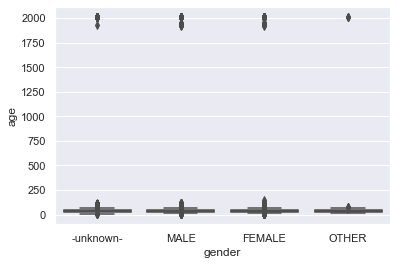

In [10]:
#Visualizing the distrubution of age for different genders in train users
sns.boxplot(x="gender", y="age", data=train_users_data)

<AxesSubplot:xlabel='gender', ylabel='age'>

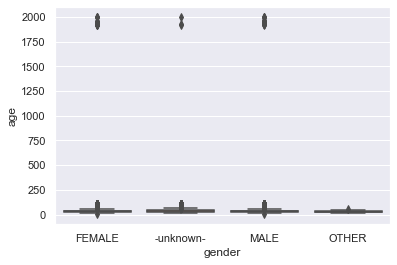

In [11]:
#Visualizing the distrubution of age for different genders in test users
sns.boxplot(x="gender", y="age", data=test_users_data)

<AxesSubplot:xlabel='signup_method', ylabel='count'>

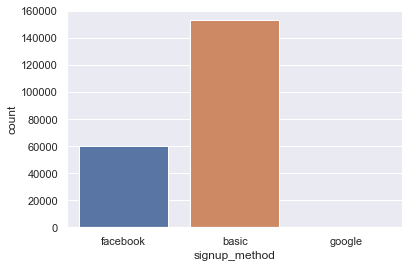

In [12]:
#Visualizing the count of different genders in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="signup_method", data=train_users_data)

<AxesSubplot:xlabel='signup_method', ylabel='count'>

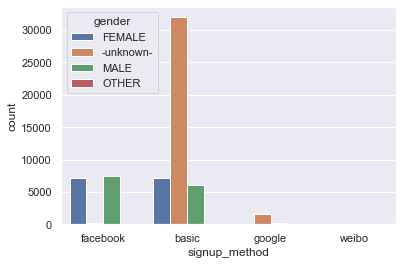

In [13]:
#Visualizing the count of different genders in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="signup_method",hue='gender',data=test_users_data)

<AxesSubplot:xlabel='signup_method', ylabel='count'>

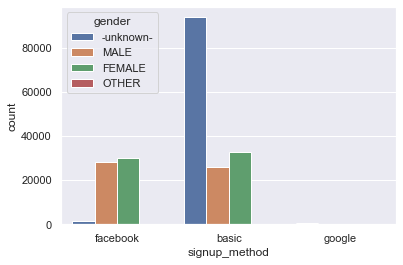

In [14]:
#Visualizing the count of different genders in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="signup_method",hue='gender',data=train_users_data)

<AxesSubplot:xlabel='language', ylabel='count'>

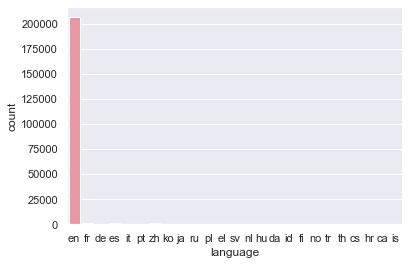

In [15]:
#Visualizing the count of languages in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="language",data=train_users_data)

<AxesSubplot:xlabel='language', ylabel='count'>

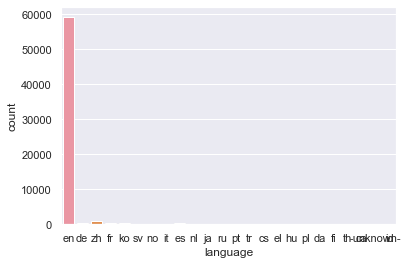

In [16]:
#Visualizing the count of languages in test users
sns.set_theme(style="darkgrid")
sns.countplot(x="language",data=test_users_data)

<AxesSubplot:xlabel='affiliate_channel', ylabel='count'>

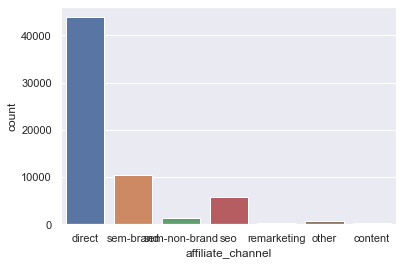

In [17]:
#Visualizing the count of languages in test users
sns.set_theme(style="darkgrid")
sns.countplot(x="affiliate_channel",data=test_users_data)

<AxesSubplot:xlabel='affiliate_channel', ylabel='count'>

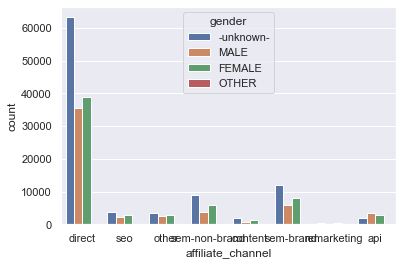

In [18]:
#Visualizing the count of languages in train users
sns.set_theme(style="darkgrid")
sns.countplot(x="affiliate_channel",hue='gender',data=train_users_data)

<AxesSubplot:xlabel='affiliate_channel', ylabel='count'>

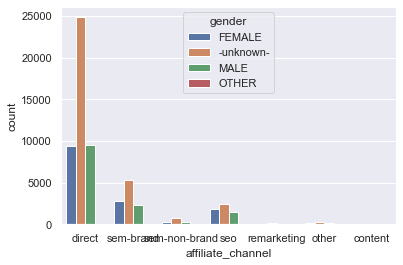

In [19]:
#Visualizing the count of languages in test users
sns.set_theme(style="darkgrid")
sns.countplot(x="affiliate_channel",hue='gender',data=test_users_data)

In [20]:
#Add more visualization at the end

Data Cleaning

In [21]:
train_users_data['date_account_created']=pd.to_datetime(train_users_data['date_account_created'])
train_users_data['timestamp_first_active']=pd.to_datetime(train_users_data['timestamp_first_active']//1000000,format='%Y%m%d')

In [22]:
train_users_data.loc[(train_users_data['gender']=='-unknown-'),'gender']='NotSpecified'

In [23]:
train_users_data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [24]:
train_users_data['first_affiliate_tracked'].fillna('No data',inplace=True)

In [25]:
test_users_data['date_account_created']=pd.to_datetime(test_users_data['date_account_created'])
test_users_data['timestamp_first_active']=pd.to_datetime(test_users_data['timestamp_first_active']//1000000,format='%Y%m%d')

In [26]:
test_users_data.loc[(train_users_data['gender']=='-unknown-'),'gender']='NotSpecified'

In [27]:
test_users_data.isnull().sum()

id                             0
date_account_created           0
timestamp_first_active         0
date_first_booking         62096
gender                         0
age                        28876
signup_method                  0
signup_flow                    0
language                       0
affiliate_channel              0
affiliate_provider             0
first_affiliate_tracked       20
signup_app                     0
first_device_type              0
first_browser                  0
dtype: int64

In [28]:
test_users_data['first_affiliate_tracked'].fillna('No data',inplace=True)

Feature Engineering

In [29]:
train_users_data['Year_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).year
train_users_data['Month_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).month
train_users_data['Day_Account_Created']=pd.DatetimeIndex(train_users_data['date_account_created']).day
train_users_data['Year_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).year
train_users_data['Month_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).month
train_users_data['Day_Timestamp_FirstActive']=pd.DatetimeIndex(train_users_data['timestamp_first_active']).day
train_users_data['days_difference_account']=train_users_data['date_account_created']-train_users_data['timestamp_first_active']
train_users_data['days_difference_account'] = pd.to_numeric(train_users_data['days_difference_account'].dt.days, downcast='integer')

In [30]:
train_users_data.loc[(train_users_data['age']>=15) & (train_users_data['age']<=19),'Age_Range']='15-19'
train_users_data.loc[(train_users_data['age']>20) & (train_users_data['age']<=24),'Age_Range']='20-24'
train_users_data.loc[(train_users_data['age']>25) & (train_users_data['age']<=29),'Age_Range']='25-29'
train_users_data.loc[(train_users_data['age']>30) & (train_users_data['age']<=34),'Age_Range']='30-34'
train_users_data.loc[(train_users_data['age']>35) & (train_users_data['age']<=39),'Age_Range']='35-39'
train_users_data.loc[(train_users_data['age']>40) & (train_users_data['age']<=44),'Age_Range']='40-44'
train_users_data.loc[(train_users_data['age']>45) & (train_users_data['age']<=49),'Age_Range']='45-49'
train_users_data.loc[(train_users_data['age']>50) & (train_users_data['age']<=54),'Age_Range']='50-54'
train_users_data.loc[(train_users_data['age']>55) & (train_users_data['age']<=59),'Age_Range']='55-59'
train_users_data.loc[(train_users_data['age']>60) & (train_users_data['age']<=64),'Age_Range']='60-64'
train_users_data.loc[(train_users_data['age']>65) & (train_users_data['age']<=69),'Age_Range']='65-69'
train_users_data.loc[(train_users_data['age']>70) & (train_users_data['age']<=74),'Age_Range']='70-74'
train_users_data.loc[(train_users_data['age']>75) & (train_users_data['age']<=79),'Age_Range']='75-79'
train_users_data.loc[(train_users_data['age']>80) & (train_users_data['age']<=84),'Age_Range']='80-84'
train_users_data.loc[(train_users_data['age']>85) & (train_users_data['age']<=89),'Age_Range']='85-89'
train_users_data.loc[(train_users_data['age']>1900) & (train_users_data['age']<=1999),'age']=train_users_data['Year_Timestamp_FirstActive']-train_users_data['age']
train_users_data.loc[(train_users_data['age']<15) & (train_users_data['age']>=90),'Age_Range']='5-9'
train_users_data['Age_Range'].fillna('11-14',inplace=True)

In [31]:
test_users_data['Year_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).year
test_users_data['Month_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).month
test_users_data['Day_Account_Created']=pd.DatetimeIndex(test_users_data['date_account_created']).day
test_users_data['Year_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).year
test_users_data['Month_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).month
test_users_data['Day_Timestamp_FirstActive']=pd.DatetimeIndex(test_users_data['timestamp_first_active']).day
test_users_data['days_difference_account']=test_users_data['date_account_created']-train_users_data['timestamp_first_active']

In [32]:
test_users_data.loc[(test_users_data['age']>=15) & (test_users_data['age']<=19),'Age_Range']='15-19'
test_users_data.loc[(test_users_data['age']>20) & (test_users_data['age']<=24),'Age_Range']='20-24'
test_users_data.loc[(test_users_data['age']>25) & (test_users_data['age']<=29),'Age_Range']='25-29'
test_users_data.loc[(test_users_data['age']>30) & (test_users_data['age']<=34),'Age_Range']='30-34'
test_users_data.loc[(test_users_data['age']>35) & (test_users_data['age']<=39),'Age_Range']='35-39'
test_users_data.loc[(test_users_data['age']>40) & (test_users_data['age']<=44),'Age_Range']='40-44'
test_users_data.loc[(test_users_data['age']>45) & (test_users_data['age']<=49),'Age_Range']='45-49'
test_users_data.loc[(test_users_data['age']>50) & (test_users_data['age']<=54),'Age_Range']='50-54'
test_users_data.loc[(test_users_data['age']>55) & (test_users_data['age']<=59),'Age_Range']='55-59'
test_users_data.loc[(test_users_data['age']>60) & (test_users_data['age']<=64),'Age_Range']='60-64'
test_users_data.loc[(test_users_data['age']>65) & (test_users_data['age']<=69),'Age_Range']='65-69'
test_users_data.loc[(test_users_data['age']>70) & (test_users_data['age']<=74),'Age_Range']='70-74'
test_users_data.loc[(test_users_data['age']>75) & (test_users_data['age']<=79),'Age_Range']='75-79'
test_users_data.loc[(test_users_data['age']>80) & (test_users_data['age']<=84),'Age_Range']='80-84'
test_users_data.loc[(test_users_data['age']>85) & (test_users_data['age']<=89),'Age_Range']='85-89'
test_users_data.loc[(test_users_data['age']>1900) & (test_users_data['age']<=1999),'age']=test_users_data['Year_Timestamp_FirstActive']-test_users_data['age']
test_users_data.loc[(test_users_data['age']<15) & (test_users_data['age']>=90),'Age_Range']='5-10'
test_users_data['Age_Range'].fillna('11-15',inplace=True)

In [33]:
test_users_data.drop(columns=['date_first_booking','age','id'],inplace=True)
target_train=train_users_data['country_destination']
train_users_data.drop(columns=['date_first_booking','age','id','country_destination','date_account_created','timestamp_first_active'],inplace=True)

In [34]:
test_users_data

,date_account_created,timestamp_first_active,gender,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,Age_Range
0,2014-07-01,2014-07-01,FEMALE,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014,7,1,2014,7,1,1930 days,11-15
1,2014-07-01,2014-07-01,-unknown-,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,2014,7,1,2014,7,1,1865 days,11-15
2,2014-07-01,2014-07-01,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,2014,7,1,2014,7,1,1848 days,11-15
3,2014-07-01,2014-07-01,-unknown-,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,2014,7,1,2014,7,1,1704 days,11-15
4,2014-07-01,2014-07-01,-unknown-,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,2014,7,1,2014,7,1,1666 days,11-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,2014-09-30,2014-09-30,-unknown-,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,2014,9,30,2014,9,30,582 days,30-34
62092,2014-09-30,2014-09-30,-unknown-,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-,2014,9,30,2014,9,30,582 days,11-15
62093,2014-09-30,2014-09-30,-unknown-,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,2014,9,30,2014,9,30,582 days,11-15
62094,2014-09-30,2014-09-30,-unknown-,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,2014,9,30,2014,9,30,582 days,11-15


In [35]:
cat_columns=['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser','Age_Range']
td=pd.get_dummies(train_users_data,columns=cat_columns)
td

,signup_flow,Year_Account_Created,Month_Account_Created,Day_Account_Created,Year_Timestamp_FirstActive,Month_Timestamp_FirstActive,Day_Timestamp_FirstActive,days_difference_account,gender_FEMALE,gender_MALE,gender_NotSpecified,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,language_cs,language_da,language_de,language_el,language_en,language_es,language_fi,language_fr,language_hr,language_hu,language_id,language_is,language_it,language_ja,language_ko,language_nl,language_no,language_pl,language_pt,language_ru,language_sv,language_th,language_tr,language_zh,affiliate_channel_api,affiliate_channel_content,affiliate_channel_direct,affiliate_channel_other,affiliate_channel_remarketing,affiliate_channel_sem-brand,affiliate_channel_sem-non-brand,affiliate_channel_seo,affiliate_provider_baidu,affiliate_provider_bing,affiliate_provider_craigslist,affiliate_provider_daum,affiliate_provider_direct,affiliate_provider_email-marketing,affiliate_provider_facebook,affiliate_provider_facebook-open-graph,affiliate_provider_google,affiliate_provider_gsp,affiliate_provider_meetup,affiliate_provider_naver,affiliate_provider_other,affiliate_provider_padmapper,affiliate_provider_vast,affiliate_provider_wayn,affiliate_provider_yahoo,affiliate_provider_yandex,first_affiliate_tracked_No data,first_affiliate_tracked_linked,first_affiliate_tracked_local ops,first_affiliate_tracked_marketing,first_affiliate_tracked_omg,first_affiliate_tracked_product,first_affiliate_tracked_tracked-other,first_affiliate_tracked_untracked,signup_app_Android,signup_app_Moweb,signup_app_Web,signup_app_iOS,first_device_type_Android Phone,first_device_type_Android Tablet,first_device_type_Desktop (Other),first_device_type_Mac Desktop,first_device_type_Other/Unknown,first_device_type_SmartPhone (Other),first_device_type_Windows Desktop,first_device_type_iPad,first_device_type_iPhone,first_browser_-unknown-,first_browser_AOL Explorer,first_browser_Android Browser,first_browser_Apple Mail,first_browser_Arora,first_browser_Avant Browser,first_browser_BlackBerry Browser,first_browser_Camino,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Chromium,first_browser_CometBird,first_browser_Comodo Dragon,first_browser_Conkeror,first_browser_CoolNovo,first_browser_Crazy Browser,first_browser_Epic,first_browser_Firefox,first_browser_Flock,first_browser_Google Earth,first_browser_Googlebot,first_browser_IE,first_browser_IE Mobile,first_browser_IceDragon,first_browser_IceWeasel,first_browser_Iron,first_browser_Kindle Browser,first_browser_Maxthon,first_browser_Mobile Firefox,first_browser_Mobile Safari,first_browser_Mozilla,first_browser_NetNewsWire,first_browser_OmniWeb,first_browser_Opera,first_browser_Opera Mini,first_browser_Opera Mobile,first_browser_Outlook 2007,first_browser_PS Vita browser,first_browser_Pale Moon,first_browser_Palm Pre web browser,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_SlimBrowser,first_browser_Sogou Explorer,first_browser_Stainless,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,Age_Range_11-15,Age_Range_15-19,Age_Range_20-24,Age_Range_25-29,Age_Range_30-34,Age_Range_35-39,Age_Range_40-44,Age_Range_45-49,Age_Range_50-54,Age_Range_55-59,Age_Range_60-64,Age_Range_65-69,Age_Range_70-74,Age_Range_75-79,Age_Range_80-84,Age_Range_85-89
0,0,2010,6,28,2009,3,19,466,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,2011,5,25,2009,5,23,732,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [36]:
td.dtypes

signup_flow                   int64
Year_Account_Created          int64
Month_Account_Created         int64
Day_Account_Created           int64
Year_Timestamp_FirstActive    int64
                              ...  
Age_Range_65-69               uint8
Age_Range_70-74               uint8
Age_Range_75-79               uint8
Age_Range_80-84               uint8
Age_Range_85-89               uint8
Length: 155, dtype: object

In [37]:
from sklearn.preprocessing import LabelEncoder
sk=LabelEncoder()
enc_y=sk.fit_transform(target_train)
enc_y

array([ 7,  7, 10, ...,  7,  7,  7])

In [38]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(td, enc_y)
xg.score(td, enc_y)

0.07892046283317333